In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import scipy.spatial
import math

In [ ]:
def geraDados(sd):
    # Criacao de matrizes com valores aleatórios:
    xc1 = 0.3 * (np.random.normal(0, np.sqrt(sd), (100, 2)) + 2)
    xc2 = 0.3 * (np.random.normal(0, np.sqrt(sd), (100, 2)) + 4)
    # Adição de coluna as matrizes xc1 (coluna = 0), e xc2 (coluna = 1):
    xc1 = np.hstack((xc1, np.zeros((100, 1))))
    xc2 = np.hstack((xc2, np.ones((100, 1))))
    # Empilhar as matrizes xc1 e xc2 na matriz xt:
    xt = np.vstack((xc1, xc2))
    return xt

In [ ]:
class KNN:
    def __init__(self, k):
        self.k = k

    def train(self, x, y):
        self.x_train = x
        self.y_train = y

    def predict(self, x_test):
        y = []
        for i in range(len(x_test)):
            d = []
            resp = []
            for j in range(len(self.x_train)):
                dist = np.sqrt(np.sum((x_test - self.x_train[j]) ** 2))
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                resp.append(self.y_train[j])
            y_aux = Counter(resp).most_common(1)[0][0]
            y.append(y_aux)
        return y

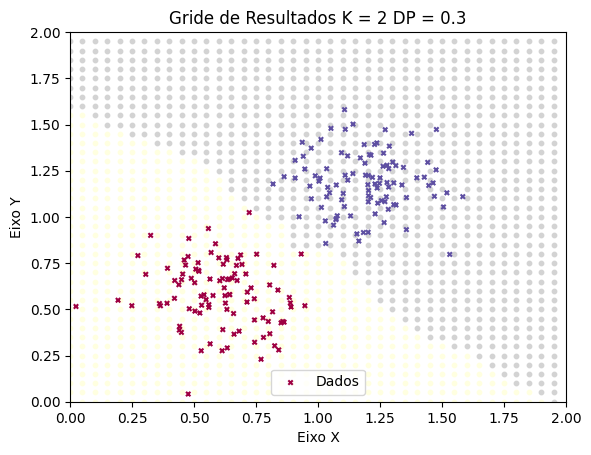

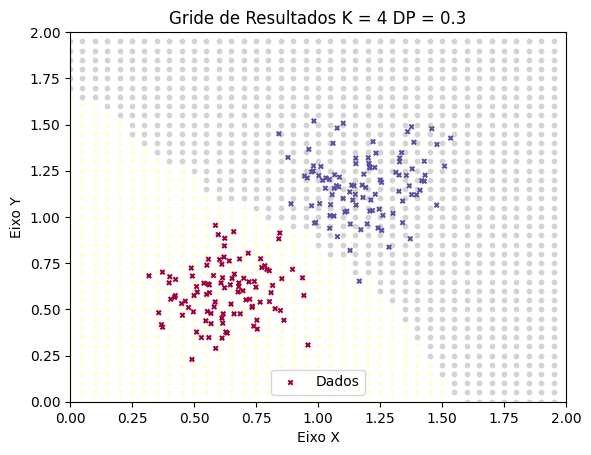

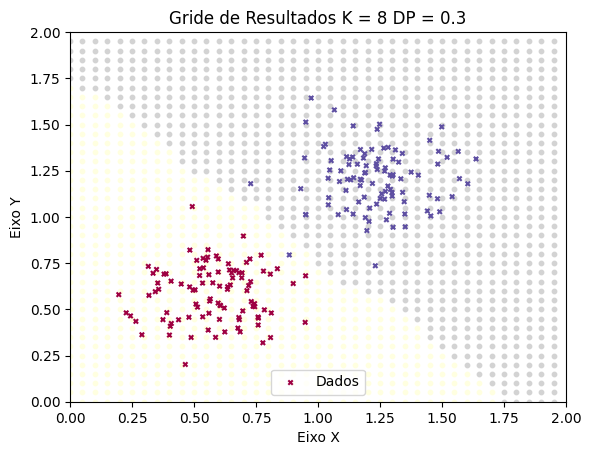

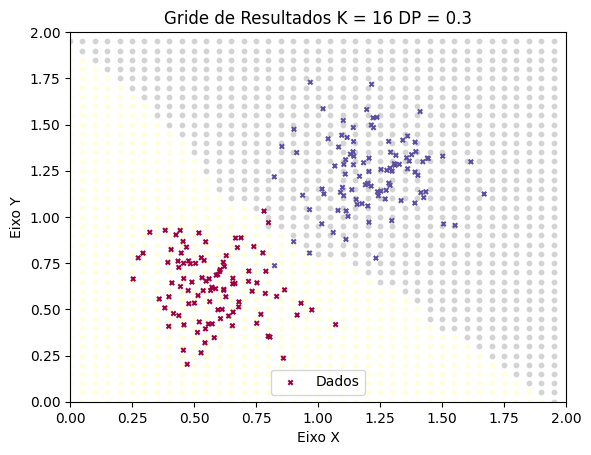

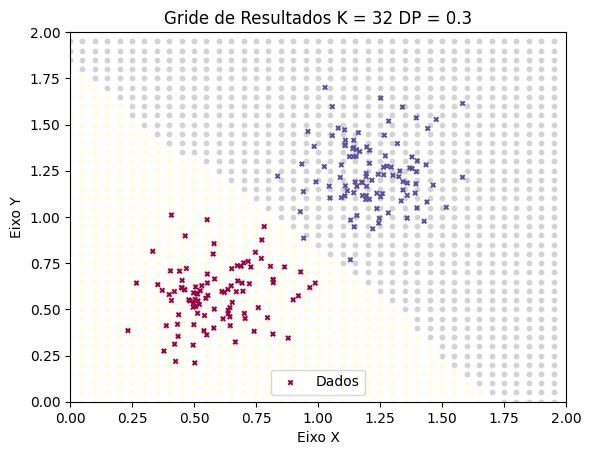

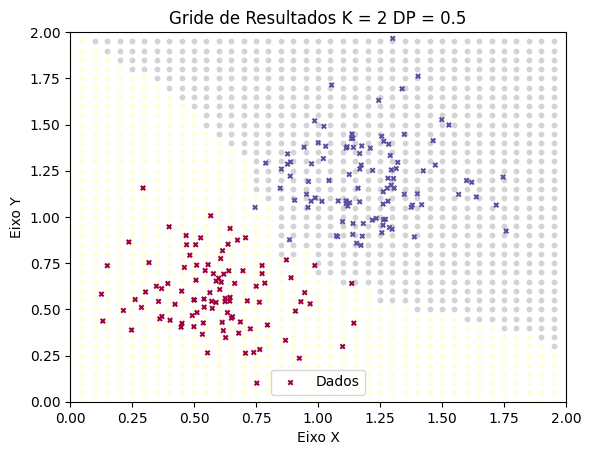

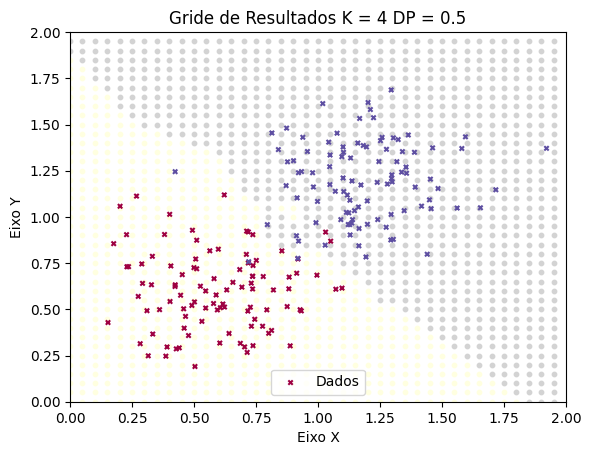

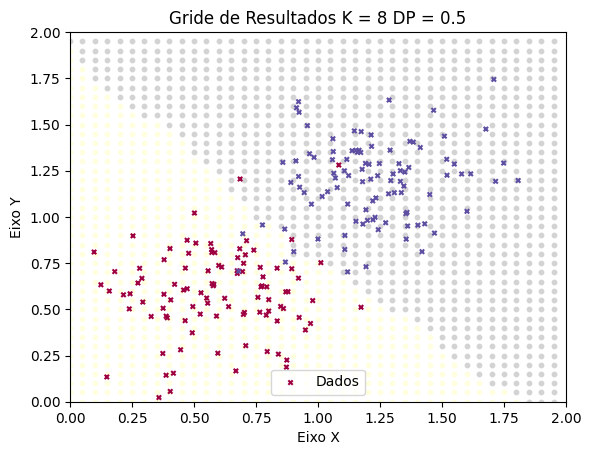

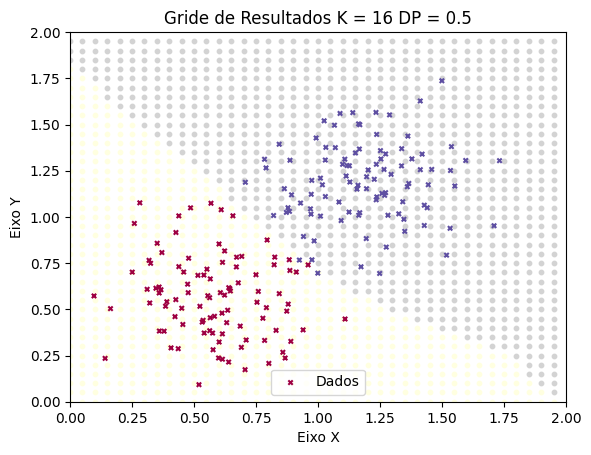

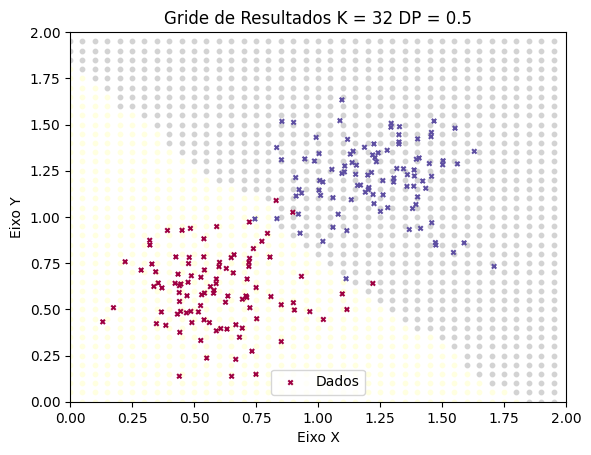

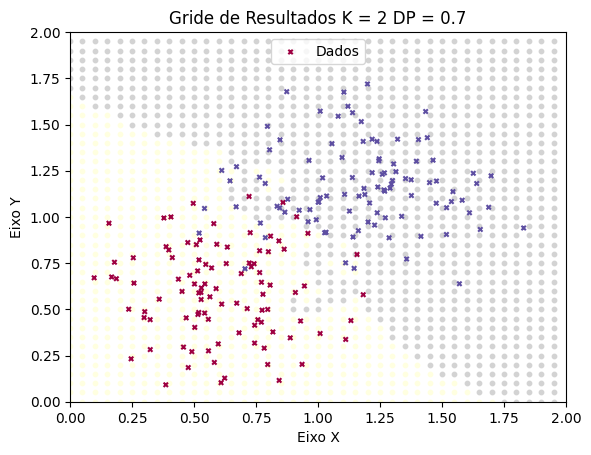

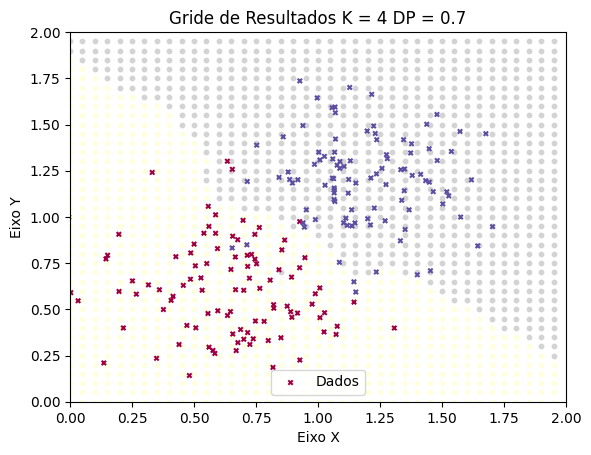

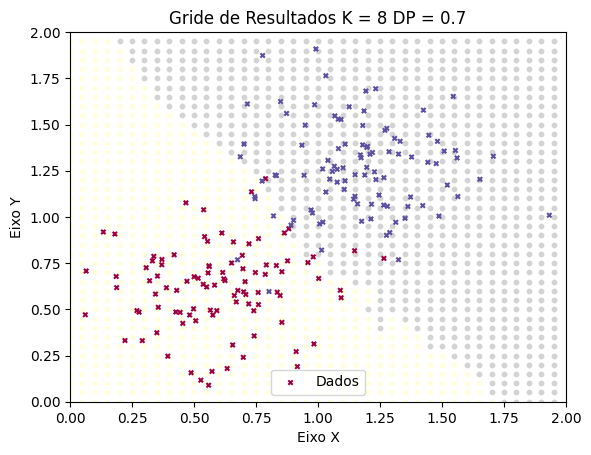

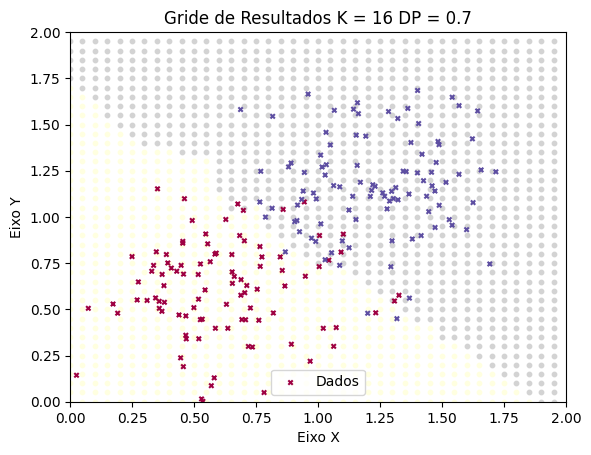

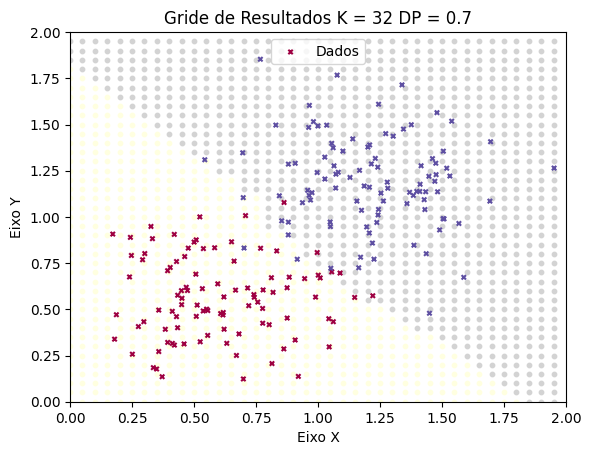

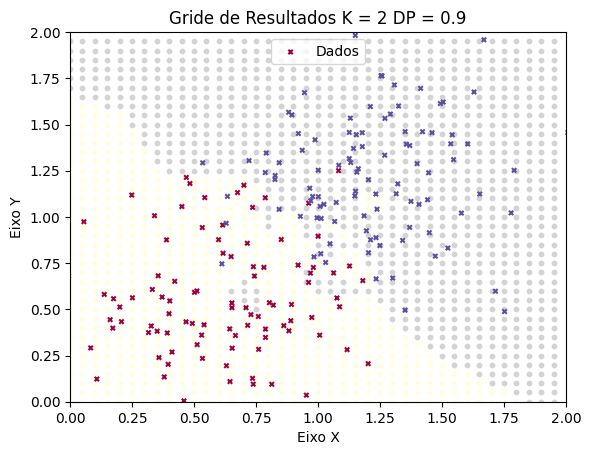

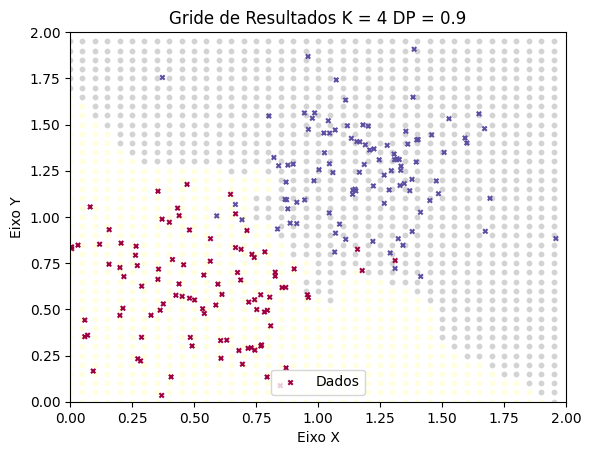

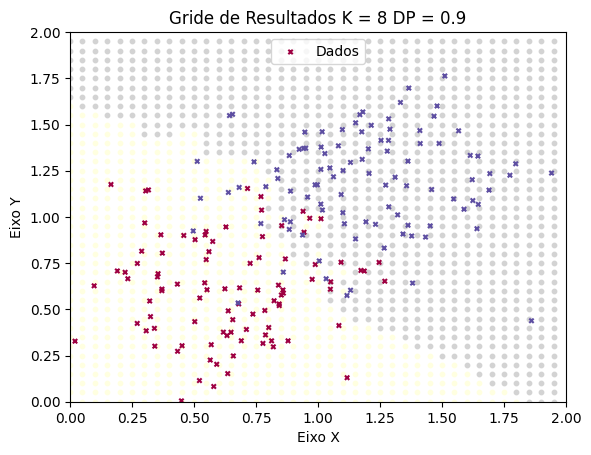

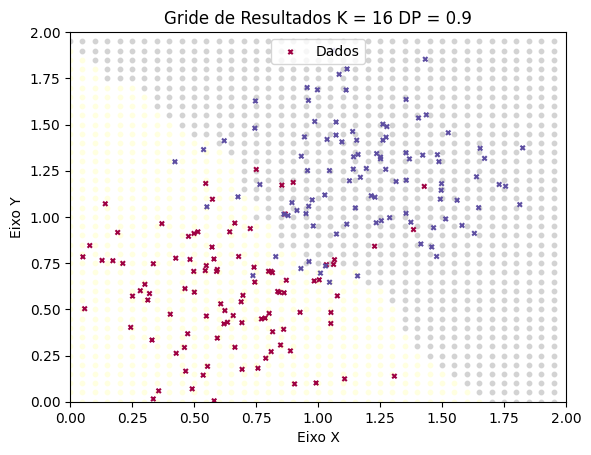

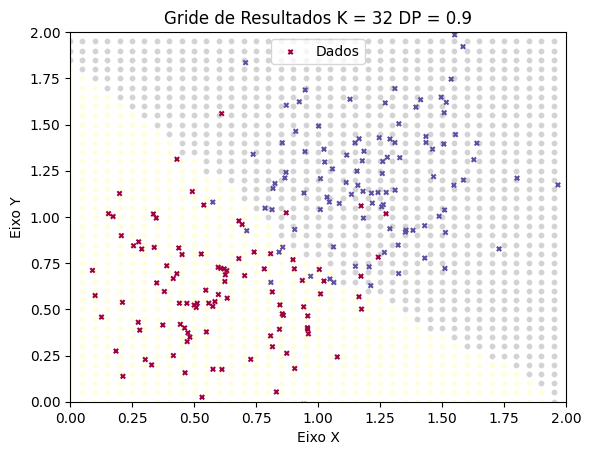

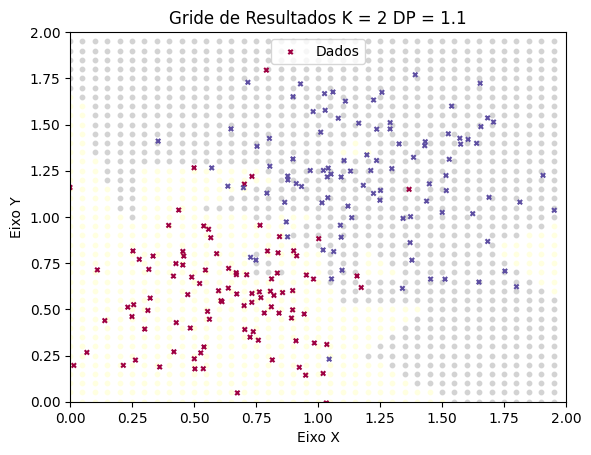

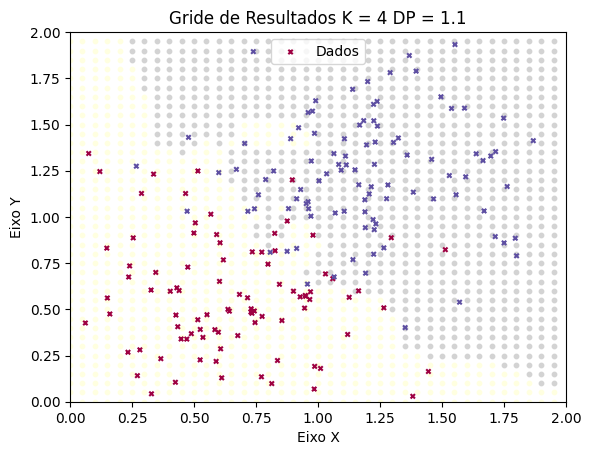

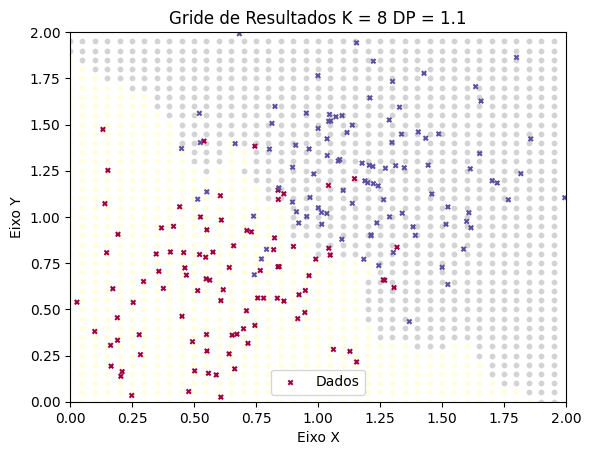

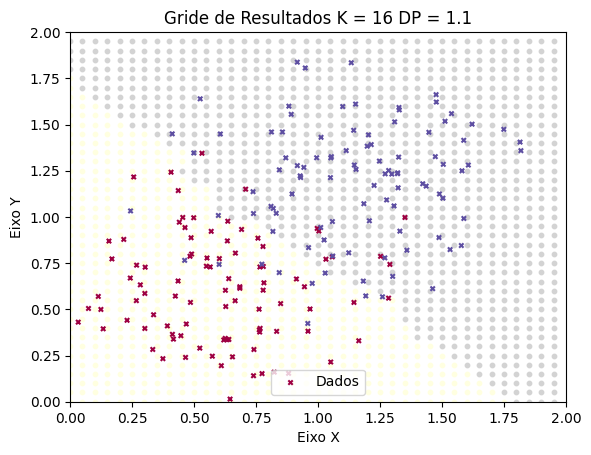

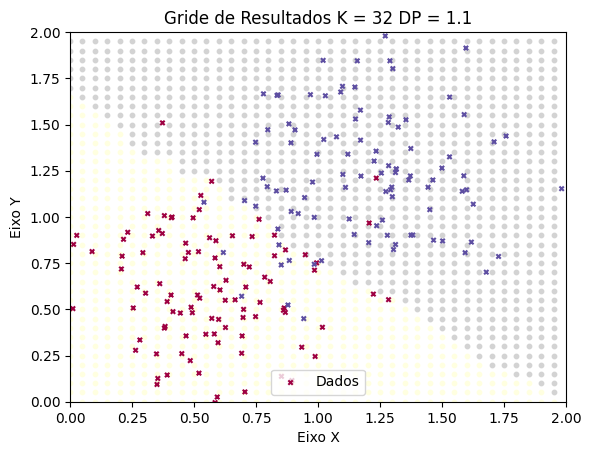

In [ ]:
Ks = [2, 4, 8, 16, 32]
DPs = [0.3, 0.5, 0.7, 0.9, 1.1]

for n in range(len(DPs)):
    for m in range(len(Ks)):
        dados = geraDados(DPs[n])
        X = dados[:, 0:2]
        Y = dados[:,2]
        knn = KNN(Ks[m])
        knn.train(X, Y)

        # Definicao do tamanho do grid e do passo
        li = 0
        ls = 2
        passo = 0.05

        # Criacao do grid com o passo especificado
        seqi = np.arange(li, ls, passo)
        seqj = np.arange(li, ls, passo)
        M = np.zeros((len(seqi), len(seqj)))

        for i in range(len(seqi)):
            for j in range(len(seqj)):
                xi = np.array([seqi[i], seqj[j]])
                M[i, j] = (knn.predict(xi)[0])

        li = 0
        ls = 2

        # Adicionar pontos ao gráfico
        for i in range(len(seqi)):
            for j in range(len(seqj)):
                if M[i, j] == 1:
                    plt.scatter(seqj[j], seqi[i], marker='o', color='lightgray', s=10)
                else:
                    plt.scatter(seqj[j], seqi[i], marker='o', color='lightyellow', s=10)

        # Plotando os dados
        plt.scatter(dados[:, 0], dados[:, 1], c=dados[:, 2], cmap='Spectral', marker='x', label='Dados', s=10)

        # Delimitação dos limites
        plt.xlim(li, ls)
        plt.ylim(li, ls)
        plt.legend()
        plt.xlabel('Eixo X')
        plt.ylabel('Eixo Y')
        plt.title(f'Gride de Resultados K = {Ks[m]} DP = {DPs[n]}')

        # Plotagem do gráfico
        plt.show()
